In [1]:
%matplotlib inline



# Betweenness

This example demonstrates how to visualize both vertex and edge betweenness with a custom defined color palette. We use the methods :meth:`igraph.GraphBase.betweenness` and :meth:`igraph.GraphBase.edge_betweenness` respectively, and demonstrate the effects on a standard [Krackhardt Kite](https://www.wikiwand.com/en/Krackhardt_kite_graph) graph, as well as a [Watts-Strogatz](https://en.wikipedia.org/wiki/Watts%E2%80%93Strogatz_model) random graph.


In [2]:
import random
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
import igraph as ig

We define a function that plots the graph  on a Matplotlib axis, along with
its vertex and edge betweenness values. The function also generates some
color bars on the sides to see how they translate to each other. We use
[Matplotlib's Normalize class](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.Normalize.html)
to ensure that our color bar ranges are correct, as well as *igraph*'s
:meth:`igraph.utils.rescale` to rescale the betweennesses in the interval
``[0, 1]``.



In [3]:
def plot_betweenness(g, vertex_betweenness, edge_betweenness, ax, cax1, cax2):
    '''Plot vertex/edge betweenness, with colorbars

    Args:
        g: the graph to plot.
        ax: the Axes for the graph
        cax1: the Axes for the vertex betweenness colorbar
        cax2: the Axes for the edge betweenness colorbar
    '''

    # Rescale betweenness to be between 0.0 and 1.0
    scaled_vertex_betweenness = ig.rescale(vertex_betweenness, clamp=True)
    scaled_edge_betweenness = ig.rescale(edge_betweenness, clamp=True)
    print(f"vertices: {min(vertex_betweenness)} - {max(vertex_betweenness)}")
    print(f"edges: {min(edge_betweenness)} - {max(edge_betweenness)}")

    # Define mappings betweenness -> color
    cmap1 = LinearSegmentedColormap.from_list("vertex_cmap", ["pink", "indigo"])
    cmap2 = LinearSegmentedColormap.from_list("edge_cmap", ["lightblue", "midnightblue"])

    # Plot graph
    g.vs["color"] = [cmap1(betweenness) for betweenness in scaled_vertex_betweenness]
    g.vs["size"]  = ig.rescale(vertex_betweenness, (0.1, 0.5))
    g.es["color"] = [cmap2(betweenness) for betweenness in scaled_edge_betweenness]
    g.es["width"] = ig.rescale(edge_betweenness, (0.5, 1.0))
    ig.plot(
        g,
        target=ax,
        layout="fruchterman_reingold",
        vertex_frame_width=0.2,
    )

    # Color bars
    norm1 = ScalarMappable(norm=Normalize(0, max(vertex_betweenness)), cmap=cmap1)
    norm2 = ScalarMappable(norm=Normalize(0, max(edge_betweenness)), cmap=cmap2)
    plt.colorbar(norm1, cax=cax1, orientation="horizontal", label='Vertex Betweenness')
    plt.colorbar(norm2, cax=cax2, orientation="horizontal", label='Edge Betweenness')

First, generate a graph, e.g. the Krackhardt Kite Graph:



In [4]:
random.seed(0)
g1 = ig.Graph.Famous("Krackhardt_Kite")

Then we can compute vertex and edge betweenness:



In [5]:
vertex_betweenness1 = g1.betweenness()
edge_betweenness1 = g1.edge_betweenness()

In [6]:
g2 = ig.Graph.Watts_Strogatz(dim=1, size=150, nei=2, p=0.1)
vertex_betweenness2 = g2.betweenness()
edge_betweenness2 = g2.edge_betweenness()

Finally, we plot the two graphs, each with two colorbars for vertex/edge
betweenness



vertices: 0.0 - 14.0
edges: 1.5 - 16.0
vertices: 0.0 - 753.8235063912693
edges: 8.951984126984126 - 477.30745059034535


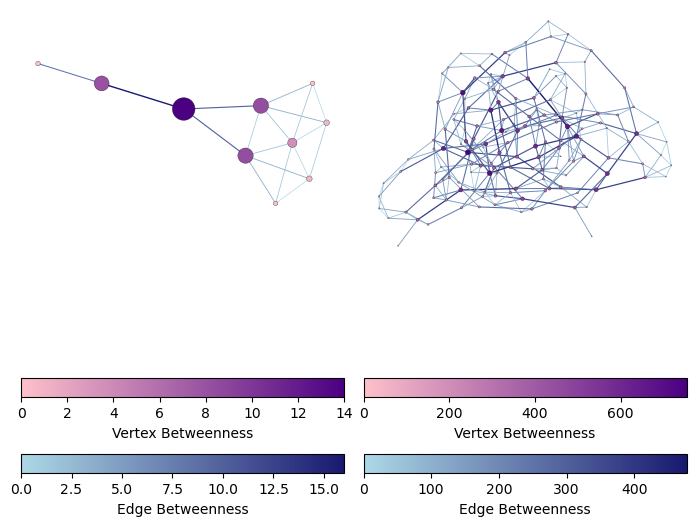

In [7]:
fig, axs = plt.subplots(
    3, 2,
    figsize=(7, 6),
    gridspec_kw=dict(height_ratios=(20, 1, 1)),
)
plot_betweenness(g1, vertex_betweenness1, edge_betweenness1, *axs[:, 0])
plot_betweenness(g2, vertex_betweenness2, edge_betweenness2, *axs[:, 1])
fig.tight_layout(h_pad=1)
plt.show()